# Singulärwertzerlegung

Jede $m\times n$ Matrix $A$ läßt sich darstellen als

$$\underbrace{A}_{m\times n}=\underbrace{U}_{m\times m} \underbrace{s}_{m\times n} \underbrace{V^T}_{n \times n}$$ 

wobei $U$ und $V$ orthogonal sind und $s$ diagonal ist. Aus der Orthogonalität folgt, dass die Spaltenvektoren $u_i$ eine Basis des $m-$dimensionalen "Datenraumes" und $v_i$ eine Basis des $n$-dimensionalen "Parameterraumes" bilden. Die Diagonalelemente $s$ nennt man die singulären Werte von $A$. Diese sind nicht negativ und der Größe nach geordnet

$$s_1\ge s_2\ge .. \ge s_m \ge0$$

Ist $p$ die Anzahl (=Rang) der von 0 verschiedenen singulären Werte von $A$, so kann $A$ geschrieben werden als

$$\underbrace{A}_{m\times n}=\underbrace{U_p}_{m\times p} \underbrace{s_p}_{p\times p} \underbrace{V_p^T}_{p \times n}$$ 

dabei werden die $U_p$ aus $U$ durch weglassen der Spalten $p+1,..,m$ gebildet ($V_p$ analog). 

Jeder Vektor $x$ des Parameterraumes kann dargestellt werden als


$$x=\sum_{i=1}^p \alpha_i v_i + \sum_{j=p+1}^n \beta_j v_j$$

oder als

$$\bf x= x^{part} + x^{null}$$

mit $\bf Ax^{null}=0$.



## Unterbestimmte Gleichungssystemte

Sei $Ax=d$ ein zu lösendes Gleichungssystem. Ist 

$${\rm rang}(A)=p\lt n$$

dann ist das Gleichungssystem nicht eindeutig lösbar. Denn hat man eine partikuläre Lösung $\bf x^{part}$ gefunden, die $F=||\bf Ax^{part}-d||$ minimiert, so minimiert auch $\bf x=x^{part}+x^{null}$ die Funktion $F$

Strategie: Wähle aus der unendlichen Anzahl von Lösungen die spezielle Lösung mit dem "kleinsten" Betrag ${\rm min}(||x||)$. Die "kleinste" Optimallösung ist gegeben durch

$$x^{part}=V_p S_p^{-1}U_p^{T}d$$

Für überbestimmte Gleichungssysteme ist $x^{part}$ die eindeutige Optimallösung

## Fazit

Die Singulärwertzerlegung der Matrix gibt uns Informationen über den "Zustand" des Gleichungssystems. Im Fall eines unterbestimmten Gleichungssystems liefert $x^{part}=V_p S_p^{-1}U_p^{T}d$ die betragskleinste Optimallösung, im Falle eines überbestimmten Systems ist diese Lösung eindeutig.




## Kondition einer Matrix 

Sei $A$ eine beliebige $m\times n$ Matrix und

$$\underbrace{A}_{m\times n}=\underbrace{U_p}_{m\times p} \underbrace{s_p}_{p\times p} \underbrace{V_p^T}_{p \times n}$$ 

ihre Singulärwertzerlegung mit $p\le \min(m,n)$. Dann ist die Kondition der Matrix $A$ definiert als Quotient des größten und kleinsten Singulärwert

$${\rm cond}(A)=\frac{S_1}{S_p}$$

VORSICHT bei großen Werten der Kondition! Eine Matrix $A$ mit ${\rm cond}(A)>>1$ nennt man "schlecht konditioniert" (ill-conditioned). Es gibt zwischen den Matrix-Zeilen "fast" lineare Abhängigkeiten.

Die Kondition ist ein Maß für die Änderung des Lösungsvektors $\delta x$ bei Änderung der Daten $\delta d$. 

$$||\delta x||\sim {\rm cond}(A)||\delta d||$$

# Beispiel: schlecht konditioniertes Gleichungssystem 



In [36]:
from pylab import *
A=array([(1.0,1.0),(1.01,1.)],dtype=float)
A

array([[ 1.  ,  1.  ],
       [ 1.01,  1.  ]])

In [37]:
cond(A)

402.00751248429634

In [39]:
U,s,V=svd(A)

In [35]:
sqrt(2)

1.4142135623730951

In [6]:
s[0]/s[1]

4002.0007501252289

In [40]:
s

array([ 2.0050125,  0.0049875])

In [18]:
d=array([2.0,2.001]).T
# Optimal-Lösung
x=dot(V,dot(inv(diag(s)),dot(U.T,d)))
x

array([-0.1  ,  2.101])

In [19]:
d=array([2.0,2.02]).T # kleine Änderung, z.B. durch Meßfehler
# Optimal-Lösung
x=dot(V,dot(inv(diag(s)),dot(U.T,d)))
x

array([-2.  ,  4.02])

# VORSICHT!!!


Bei schlecht konditionierten Gleichungssystemen ist größte Vorsicht geboten! Kleine Änderungen in den Datenvektoren, z.B. durch Messungenauigkeiten, führen zu großen Änderungen in der Lösung für die zu bestimmenden Parameter.

In [46]:
A=array([(2.0,3.01),(1.001,-1.)],dtype=float)
print cond(A)
A=array([(2.0,3.01),(2.001,3.)],dtype=float)
print cond(A)
A=array([(1,.01),(.01,0.0001)],dtype=float)
print cond(A)



2.62342047842
1132.72840879
7.3798044618e+19



# Empirische Orthogonalfunktionen 

Jede (stetige) Funktion $f$ lässt sich darstellen als Linearkombination von orthogonalen Basisfunktionen

$$f(x)=\sum_i^\infty \alpha_i o_i(x)$$

Beispiele: Fourierreihen ($o_i(x)=\sin(\nu_i x)$), Polynome ($o_i(x)=x^{i-1}$), Kugelfunktionen etc.

Im Gegensatz zu diesen allgemeinen Zerlegungen sind die sogennanten empirischen Orthogonalfunktionen (EOFs) auf ein spezielles Problem zugeschnitten. 

## Anwendungen der EOF-Zerlegung

 * Luftdruckmuster: Arktische Oszillation (AO)
 * Muster von Ozeanoberflächentemperaturen-Zeitreihen: PDO
 * Analyse von Altimeter-Daten (Meeresspiegel-Anstieg)
 * Füllen von Datenlücken 
 * Singular Spectrum Analysis

## Beispiel Argo-Profile: Temperatur und Salzgehaltsprofile 

Argo-Floats (http://en.wikipedia.org/wiki/Argo_%28oceanography%29) messen Temperatur und Salzgehalt.

Seien an $n$ Punkten Temperatur- oder Salzgehaltsprofile $d_i (i=1,..,n)$ gemessen. 

$$d_i=[S_i(z_1),S_i(z_2),..,S_i(z_m)]^T$$ ($m$ Messungen in den Tiefen $z_1$, $z_2$,..,$z_m$)

Fasst man die Daten $d_i$ in der $n\times m$-Matrix $\bf D$ zusammen

$${\bf D}= \bf O \bf \alpha$$

so erhält man die Koeffizienten $\bf \alpha$ und Orthogonalvektoren $\bf O$ aus der Singulärwertzerlegung (SVD) der Datenmatrix

$${\bf D}= {\bf U S V}^T$$

als $\bf \alpha=U$ und ${\bf O}={\bf S V}^T$.




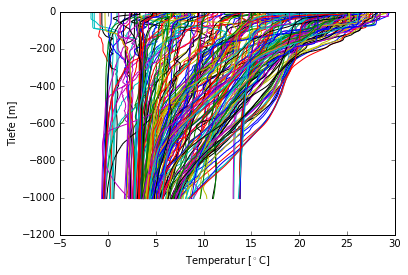

In [57]:
N=236 # Anzahl Profile, Ausgabe
DATA=reshape(fromfile('T_S_profiles.dat',dtype=float,sep=','),(200,2,N))

Z=linspace(5,1005,200)
T=DATA[:,0,:].T
S=DATA[:,1,:].T

D=T # wir nehmen als Datenvektor den Salzgehalt/ die Temperatur
for i in range(N):
    plot(D[i],-Z)
xlabel('Temperatur [$^\circ$C]')
ylabel('Tiefe [m]')

## SVD-Zerlegung

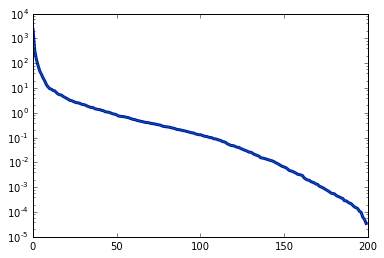

In [58]:
U, s, V = svd(D, full_matrices=False)
semilogy(s,linewidth=3)
plot(s)

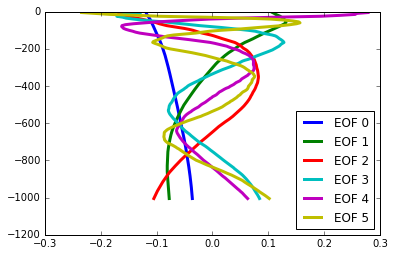

In [59]:
for i in range(6):
    plot(V[i,:],-Z,label='EOF '+str(i),linewidth=3)
legend(loc=4)

Mittlere quadratische Abweichung:  0.131615953735


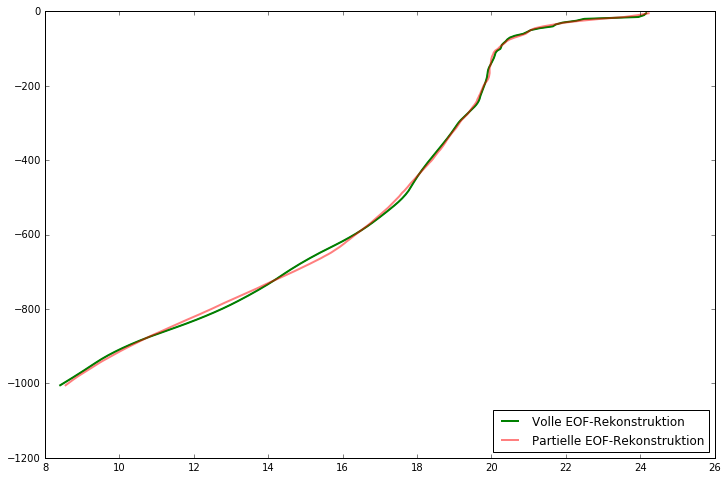

In [65]:
i=3# Index Profil für Beispielplot
D_r=dot(U,dot(diag(s),V)) # Volle Rekonstruktion mit allen Singulärwerten

O=zeros((200,200))
k=10# Nutze EOF 0-k zur Rekonstruktion
O[0:k,:]=dot(diag(s[0:k]),V[0:k,:])
D_k=dot(U,O)
figure(figsize=(12,8))
plot(D[i,:],-Z,'k-',linewidth=1)
plot(D_r[i,:],-Z,'g-',linewidth=2,label='Volle EOF-Rekonstruktion')
plot(D_k[i,:],-Z,'r-',linewidth=2,alpha=0.5,label='Partielle EOF-Rekonstruktion')
legend(loc=4)
print('Mittlere quadratische Abweichung: ',rms_flat(D[i,:]-D_k[i,:]))

## EOF-Rekonstruktion

Die EOF-Rekonstruktion mit $k<<m$ Koeffizienten liefert eine brauchbare Näherung an das Orginalprofil. Das Orginal-Profil enthält 200 Werte, die durch nur wenige Koeffizienten und die entsprechenden Orthogonalfunktionen repäsentiert wird.

## Übung

Führen Sie die EOF-Zerlegung für die $N$ Salzgehaltsprofile durch. Beurteilen Sie die Qualität der EOF-Rekonstruktion für einige Stichproben. Wie viele Koeffizienten $k$ sind notwendig, um eine gute Näherung zu bekommen?

## Argo-Prozessierung 

Zunächst müssen wir die Daten etwas aufbereiten, bevor wir uns der EOF-Zerlegung widmen.

 * Download vom FTP-Server
 * Einlesen und Darstellen
 * Interpolation auf äquidistante Arrays zwischen 5-1005 m in 5 m Abstand
 * Speichern der Zwischnenergebnisse für die weitere Bearbeitung
 
### Download vom FTP-Server

In [1]:
#!/usr/bin/env python
import os,os.path
from ftplib import FTP

tmp_dir='data/'
os.system('mkdir '+tmp_dir)

ftp_adr='ftp.ifremer.fr'
ftp_dir='/ifremer/argo/geo/atlantic_ocean/2016/06/'

ftp = FTP(ftp_adr)   # connect to host, default port
ftp.login()          # user anonymous, passwd anonymous@
ftp.cwd(ftp_dir)

file_list=ftp.nlst()

for f in file_list:
    urlfile='ftp://'+ftp_adr+ftp_dir+f
    localfile=tmp_dir+f
   
    if not(os.path.exists(localfile)):
        print('Getting file '+f)
         #We use curl instead of ftp.retrbinary for download
        os.system("curl -s -k -o "+localfile+"  "+urlfile)
    else:
        print('file '+f+' exists')

ftp.close()

Getting file 20160601_prof.nc
Getting file 20160602_prof.nc
Getting file 20160603_prof.nc
Getting file 20160604_prof.nc
Getting file 20160605_prof.nc
Getting file 20160606_prof.nc
Getting file 20160607_prof.nc


### Vorprozessierung

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
/usr/local/lib/python3.4/dist-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


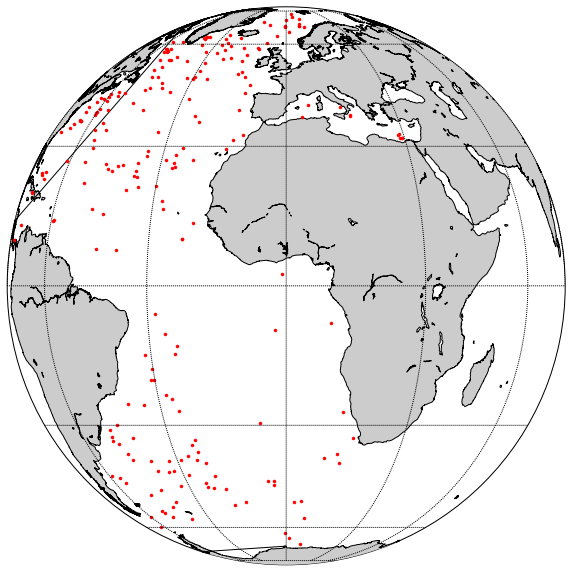

236


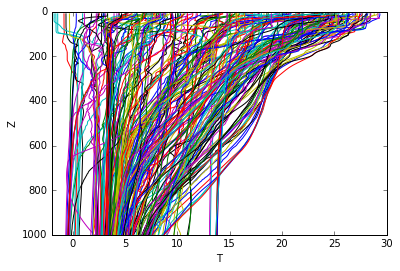

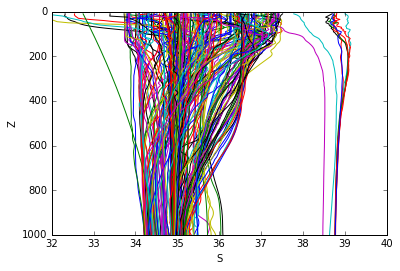

In [28]:
%pylab inline
import scipy.io as io
import glob
from pylab import *
from mpl_toolkits.basemap import Basemap
import scipy.interpolate as interpolate

tmp_dir='data/'

file_liste=glob.glob(tmp_dir+'*.nc')

D={}# Empty dictionary to store selected profiles
for f in file_liste:# Loop over all data
    # Open netcdf data file
    fid=io.netcdf_file(f,'r')

    # Read content into variables
    lat=fid.variables['LATITUDE'][:].copy()
    lon=fid.variables['LONGITUDE'][:].copy()
    T=fid.variables['TEMP_ADJUSTED'][:].copy()
    S=fid.variables['PSAL_ADJUSTED'][:].copy()
    P=fid.variables['PRES_ADJUSTED'][:].copy()
    
    #T=fid.variables['TEMP'][:].copy()
    #S=fid.variables['PSAL'][:].copy()
    #P=fid.variables['PRES'][:].copy()
    
    
    T[T>=99999]=nan # Set 99999.0 to "Not a Number"
    P[P>=99999]=nan
    S[S>=99999]=nan

    (nr_profs,Z)=T.shape # Get dimension
    
    nm=nanmax(P,axis=1)
    cantdoit=0
    for i in range(nr_profs):
        if nm[i]>1000:
            #Spline interpolation
            
            x=P[i,:]
            y=T[i,:]
            ind=isfinite(y)
            Z=linspace(10,1010,200)
            try:
                tck=interpolate.splrep(x[ind],y[ind],k=2) # Calculate coefficients at the supporting points
                Ti=interpolate.splev(Z,tck)
        
                x=P[i,:]
                y=S[i,:]
                ind=isfinite(y)
               
                tck=interpolate.splrep(x[ind],y[ind],k=2) # Calculate coefficients at the supporting points
                Si=interpolate.splev(Z,tck)
                if sum(isnan(Si))==0:
                    if max(Ti)<35.0:
                        D[(lon[i],lat[i])]=(Ti,Si,Z)
            except:
                cantdoit+=1
    #print(cantdoit)
    # Close data file
    fid.close()

#fid=open('lat_lon_T.tab','w')
#for k in D.keys():# write position (lat,lon), surface temperature to file
#    fid.write(str(k[0])+'\t'+str(k[1])+'\t'+str(D[k][0][0])+'\n')
#fid.close()


# Draw map of positions
fig=figure(figsize=(10,10))
m = Basemap(projection='ortho',lon_0=0,lat_0=0,resolution='l')

for lon,lat in D.keys():
    x,y=m(lon,lat) # Coordinate transfer
    m.plot(x,y,'r.')
m.fillcontinents()
m.drawcoastlines()
m.drawmeridians(arange(0, 360, 30))
m.drawparallels(arange(-90, 90, 30))
show()
savefig('argo_position.png',dpi=100)

# Plot profiles
figure()
for k in D.keys():
#    print k
    plot(D[k][0][:],D[k][2][:])
axis([-2,30,1000,0])
xlabel('T')
ylabel('Z')

savefig('T_plot.png',dpi=75)

# Plot profiles
figure()
for k in D.keys():
#    print k
    plot(D[k][1][:],D[k][2][:])
axis([32,40,1000,0])
xlabel('S')
ylabel('Z')

savefig('S_plot.png',dpi=75)

N=len(D.keys())
print(N)
DATA=zeros((200,2,N))
for i,k in enumerate(D.keys()):
    
    DATA[:,0,i]=D[k][0][:] # T
    DATA[:,1,i]=D[k][1][:] # S
        
DATA.tofile('T_S_profiles.dat',sep=',')


# EOF-Muster: Klimaindizes 
 
 * http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/loading.html

In [4]:
%pylab inline
import pandas as pd
from datetime import datetime, timedelta
from dateutil.parser import parse

from mpl_toolkits.basemap import Basemap, addcyclic
import gzip,os
import scipy.stats as stats
import scipy.linalg as la
import scipy.io as io

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis2.derived/surface/mslp.mon.mean.nc

{'mslp': <scipy.io.netcdf.netcdf_variable object at 0x7fcec80da4a8>, 'lon': <scipy.io.netcdf.netcdf_variable object at 0x7fcec367cd68>, 'time': <scipy.io.netcdf.netcdf_variable object at 0x7fcec80da710>, 'lat': <scipy.io.netcdf.netcdf_variable object at 0x7fcec80da0b8>, 'time_bnds': <scipy.io.netcdf.netcdf_variable object at 0x7fcec80da7b8>}
b'Pascals'


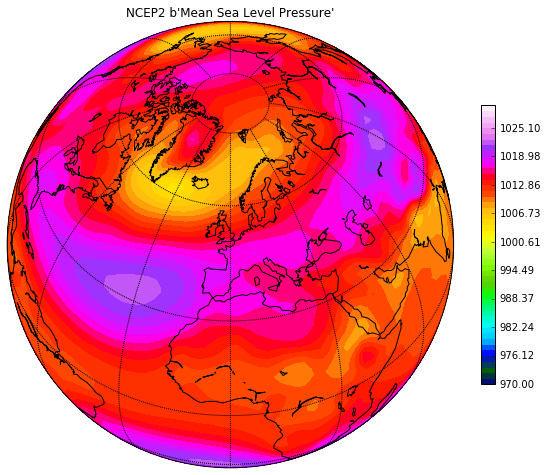

In [19]:
fid=io.netcdf_file('mslp.mon.mean.nc','r') # monthly values for 1979/01/01 to 2013/12/31
print(fid.variables)
mslp=fid.variables['mslp']
lat=fid.variables['lat'][:]
lon=fid.variables['lon'][:]
time=fid.variables['time']

P=mslp.data*mslp.scale_factor+mslp.add_offset
print(mslp.units)

P0=mean(P[:,:,:],axis=0)/100.0 # Mean Sea Level in hPa
Pc, lonc = addcyclic(P0, lon)

fig=figure(figsize=(10,10))
m= Basemap(resolution='c',projection='ortho',lon_0=0,lat_0=50)

x,y=m(*meshgrid(lonc,lat))
ps=linspace(970,1030)

m.contourf(x,y,Pc,ps,cmap=cm.gist_ncar)
m.drawcoastlines()
m.drawmeridians(arange(0, 360, 30))
m.drawparallels(arange(-90, 90, 30))
title('NCEP2 '+str(mslp.var_desc))
colorbar(shrink=0.5)

In [12]:
P_anom.shape

(439, 73, 144)

In [13]:
P_anom=P/100-P0

D=reshape(P_anom,(439,73*144))

U, s, V = svd(D, full_matrices=False)

EOF=reshape(V[0,:],(73,144))

In [17]:
EOF=reshape(V[0,:],(73,144))
EOF.max()

0.036911882

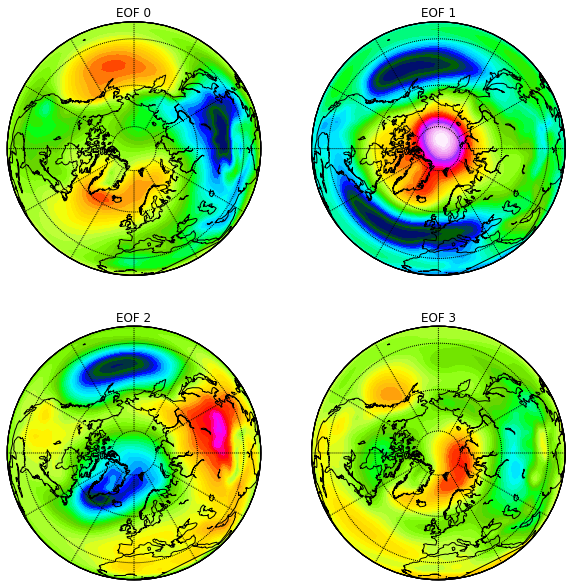

In [20]:
fig=figure(figsize=(10,10))
for k in range(4):
    subplot(2,2,k+1)
    
    EOF=reshape(V[k,:],(73,144))
    Pc, lonc = addcyclic(EOF, lon)

    m= Basemap(resolution='c',projection='ortho',lon_0=0,lat_0=90)

    x,y=m(*meshgrid(lonc,lat))
    ps=linspace(EOF.min(),EOF.max())

    m.contourf(x,y,Pc,ps,cmap=cm.gist_ncar)
    m.drawcoastlines()
    m.drawmeridians(arange(0, 360, 30))
    m.drawparallels(arange(-90, 90, 30))
    title('EOF '+str(k))

#colorbar(shrink=0.5)

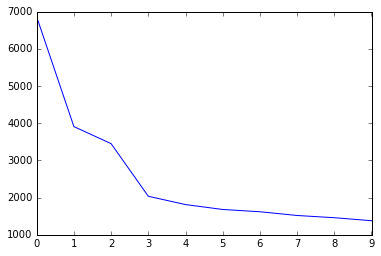

In [28]:
plot(s[0:10]) # Singulärwerte

# Interpolation

Ein übliches Problem der Zeitserien- bzw. Signalanalyse ist der Übergang vom diskreten Signal zu einer kontinuierlichen Beschreibung mittels analytischer Funktionen. Dieser Übergang ist im Allgemeinen notwendig, um Werte geeignet zu interpolieren oder Daten zu filtern. Die sogenannte Interpolierende (oder Interpolante) ist eine stetige Funktion die Werte zwischen diskreten Mess- bzw. Abtastpunkten generiert. Wenn eine theoretische analytische Beschreibung für das Signal nicht existiert,  dann besteht das Interpolationsproblem darin, die Funktion zu bestimmen, die einen optimalen Fit durch die Daten erzeugt.

## Polynominterpolation

https://de.wikipedia.org/wiki/Polynominterpolation

Für $n+1$ gegebene Wertepaare $(x_i,\,f_i)$ mit paarweise verschiedenen Stützstellen $x_i$ wird ein Polynom $P$ maximal $n$-ten Grades gesucht, das alle Gleichungen

$$P(x_i) = f_i, \quad i=0,\dotsc,n$$

erfüllt. 

## Beispiel lineare Interpolation

Gegeben sind zwei Beobachtungen y_1(x_1) und y_2(x_2) an unterschiedlichen Orten $x_1$ und $x_2$. Wir benötigen eine Schätzung der Beobachtungsvariable an einem Ort $r$ 
dazwischen. Ein erster Ansatz ist die lineare Interpolation:

$$y(r)= y_1(x_1)\frac{|x_2-r|}{|x_2-x_1|}+y_2(x_2)\frac{|x_1-r|}{|x_2-x_1|} $$


Populating the interactive namespace from numpy and matplotlib


[0.9, 2.1, 0, 4]

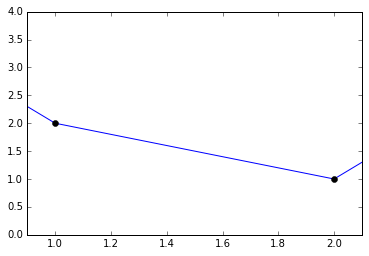

In [43]:
%pylab inline
def linear_interpol(x,y,r):
    y_i=y[0]*abs(x[1]-r)/abs(x[1]-x[0])+y[1]*abs(x[0]-r)/abs(x[1]-x[0])
    return y_i

X=array([1,2])
Y=array([2,1])
r=linspace(0,3,1000)
y_i=linear_interpol(X,Y,r)
plot(r,y_i)
plot(X,Y,'ko')
axis([0.9,2.1,0,4])

## Lagrange-Interpolation

Im Falle von $M$ Datenpunkten kann der Ansatz erweitert werden auf die sogenannte Lagrange-Interpolation mit den Lagrange-Polynomen $l_i$ als Basisfunktionen

$$y(r)=\sum_i^M l_i(r)y_i(x_i)$$

mit 
$$l_i=\prod_{j,i\ne j}^M\frac{r-x_j}{x_i-x_j}$$

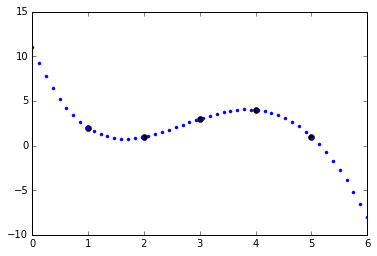

In [42]:
def lagrange_interpolation(r,X,Y):
    M=len(X)
    f=0
    for i in range(M):
        P=[]
        for j in range(M):
            if i!=j:
                P.append((r-X[j])/(X[i]-X[j]))                 
        L=product(array(P))
        f=f+L*Y[i]
    return f


X=array([1,2,3,4,5])
Y=array([2,1,3,4,1])

r=linspace(0,6)
plot(X,Y,'ko')
for ri in r:
    y=lagrange_interpolation(ri,X,Y)
    plot([ri],[y],'b.')


Ein Nachteil der Lagrange-Darstellung ist jedoch, dass alle Basisvektoren bei Hinzunahme einer einzelnen Stützstelle komplett neu berechnet werden müssen, weshalb dieses Verfahren für die meisten praktischen Zwecke zu aufwendig ist.

# Upsampling und FFT-Interpolation

https://de.wikipedia.org/wiki/Upsampling

https://en.wikipedia.org/wiki/Upsampling



## Beispiel: Verdopplung der Abtastrate

Im folgenden Beispiel verdoppeln wir die Abtastrate durch Einfügen von Nullen hinter jedem Messwert. Mit einem nachträglich angewandten Tiefpaßfilter erhalten wir ein interpoliertes Signal.



/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


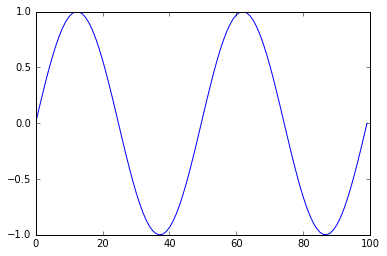

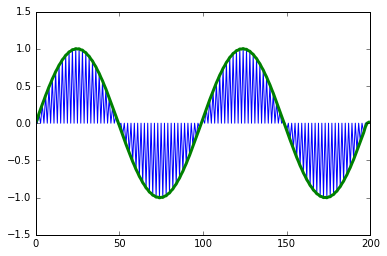

In [76]:
from scipy import signal
from scipy.fftpack import fft, fftshift

numtaps=15
window=signal.firwin(numtaps,cutoff = 0.5, pass_zero=True)

#signal.convolve

N=100
m=N*2
x=linspace(0,4*pi,N)
y=sin(x)
Y=zeros(m) 
Y[::2]=y # Jedes zweite Element wird aus Array y übernommen, der Rest bleibt Null
figure()
plot(y)
figure()
plot(Y)

Y_tiefpass=signal.convolve(Y,window,mode='same')
plot(Y_tiefpass*2,'g-',lw=3)

## FFT-Interpolation

Das Einfügen von Nullen kann man auch im Spektrum durchführen. Die Rücktransformation (Inverse FFT) erzeugt ein interpoliertes Signal. Das Einfügen von Nullen wird als "Zero padding" bezeichnet.

http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fft.irfft.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain

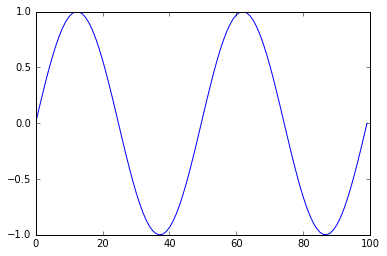

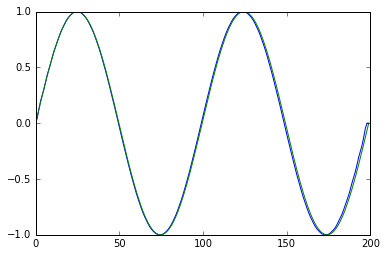

In [51]:
N=100
m=N*2
x=linspace(0,4*pi,N)
a=sin(x)
a=a#+randn(N)*0.3
X=linspace(0,4*pi,m)
A=sin(X)

a_resamp = irfft(rfft(a), m)
figure()
plot(a)
figure()
plot(a_resamp*2)
plot(A)


## Interpolation mit Splines

Splines sind stückweise Polynome und besonders zur Interpolation geeignet. Normale Polynome hoher Ordnung (>5) sind üblicherweise instabil und nicht für die Interpolation von vielen Datenpunkten geeignet. Daher wird die Interpolation stückweise mit Polynomen niedriger Ordnung vorgenommen. An den Datenpunkten, auch Knotenpunkte oder Stützstellen genannt, sollen gewisse Bedingungen (Stetigkeit und Differenzierbarkeit) sichergestellt werden. Daraus ergibt sich eine Berechnungsvorschrift für die Polynom-Koeffizienten.

Eine wichtige Funktionengruppe sind die sogenannten B-Splines (Basis-Splines). Die B-Spline-Zerlegung lautet

$$
s(x)=\sum_{k\in Z} c(k) \beta^n (x-k)
$$
mit den Koeffizienten $c(k)$ und den um $k$-verschobenen B-Splines $\beta^n$ der Ordnung $n$. Die B-Splines ergeben sich aus der rekursiven Faltung eines Rechtecksignals

$$\beta^0(x)=\left\{ \begin{array}{cc}1, & -\frac{1}{2} < x < \frac{1}{2}  \\ \frac{1}{2}, & x=\frac{1}{2}\\ 0, & sonst  \end{array} \right. $$

$$\beta^n(x)=\underbrace{\beta^0*\beta^0*...*\beta^0(x)}_{\times n+1}$$

Die Module scipy.interpolate und scipy.ndimage.interpolate stellen Funktionen bereit, um die Spline-Zerlegung von ein- und mehr-dimensionalen Signalen bzw. Bildern zu berechnen. Es sind zwei Schritte notwendig. Im ersten Schritt wird mit der
Funktion interpolate.splrep die Spline-Repräsentation (Koeffizienten) berechnet. Die Funktion interpolate.splev evaluiert die Koeffizienten an neuen Stützstellen und liefert so den zweiten Schritt für eine Interpolation.


## References

 * Bernd Jähne, Digitale Bildverarbeitung, ZMAW-Bilbliothek, Signatur: DAT-SIG J 2 (4 Exemplare vorhanden)
 * Unser, M. (1999),  Splines: a perfect fit for signal and image processing, IEEE Signal Processing Magazine, http://bigwww.epfl.ch/publications/unser9902.pdf

Populating the interactive namespace from numpy and matplotlib


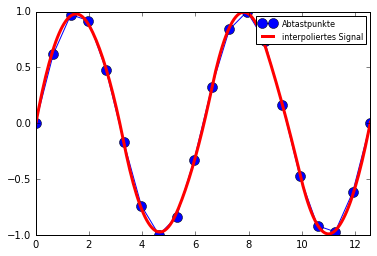

In [3]:
%pylab inline
from scipy import interpolate 
N=20
m=200
x=linspace(0,4*pi,N)
a=sin(x)
a=a#+randn(N)*0.3
X=linspace(0,4*pi,m)
A=sin(X)


#Spline Interpolation
tck=interpolate.splrep(x,a,k=2,s=0.01) # Berechne Koeffizienten an den Datenpunkten Ordnung k=2
spline_interp=interpolate.splev(X,tck) # Berechne Spline-Interpolation auf feinem Gitter
figure()
plot(x,a,'bo-',markersize=10,label='Abtastpunkte')
plot(X,spline_interp,'r-',linewidth=3,label='interpoliertes Signal')
#title('n='+str(n)+' w='+str(w))
axis('tight')
legend(loc=1,fontsize=8)
show()

## Beispiel: Datenlücken, irreguläre Abtastung

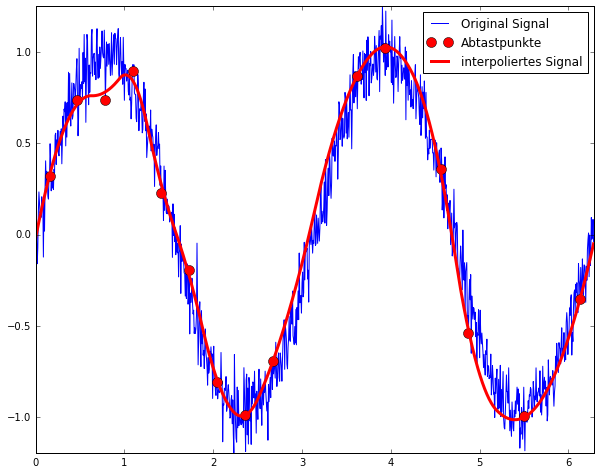

In [4]:

N=1000 # Nahezu kontinuierliche Abtastung mit N Punkten (feines Gitter)
n=20 # Anzahl von Diskreten Datenpunkten mit zufälligen Datenlücken 
w=2 # Anzahl von Sinusschwingungen im Interval

s=N/n# Skalierung

X=linspace(0,w*pi,N)
Y=sin(1*X*w)+randn(N)*0.1

i=arange(0,n)
x=X[(i*s+s/2).astype(int)]
y=Y[(i*s+s/2).astype(int)]

# Zufällige Datenlücken
y[randint(n,size=5)]=nan
index=isfinite(y)
y=y[index]
x=x[index]

#Spline Interpolation
tck=interpolate.splrep(x,y,k=2,s=0.01) # Berechne Koeffizienten an den Datenpunkten Ordnung k=2
spline_interp=interpolate.splev(X,tck) # Berechne Spline-Interpolation auf feinem Gitter
figure(figsize=(10,8))
plot(X,Y,'b-',label='Original Signal')
plot(x,y,'ro',markersize=10,label='Abtastpunkte')
plot(X,spline_interp,'r-',linewidth=3,label='interpoliertes Signal')
axis('tight')
legend()
show()


## Octave Beispiele
### 1D
https://www.gnu.org/software/octave/doc/v4.0.0/One_002ddimensional-Interpolation.html


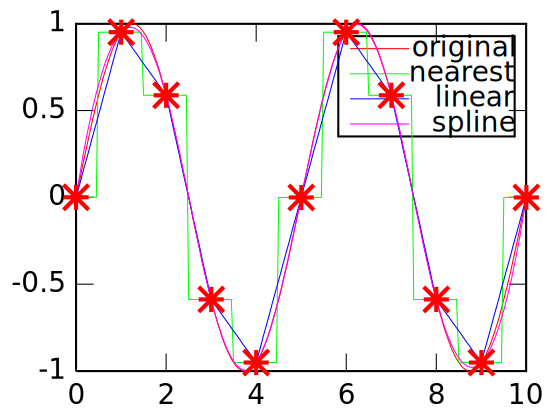

error: invalid value = northeast
error: set: invalid value for radio property "location" (value = northeast)
error: called from:
error:   /usr/share/octave/3.8.1/m/plot/appearance/legend.m at line 995, column 11


In [15]:
xf = [0:0.05:10];
yf = sin (2*pi*xf/5);
xp = [0:10];
yp = sin (2*pi*xp/5);
lin = interp1 (xp, yp, xf);
near = interp1 (xp, yp, xf, "nearest");
spl = interp1 (xp, yp, xf, "spline");
plot (xf,yf,"r", xf,near,"g", xf,lin,"b", xf,spl,"m",xp,yp,"r*");
legend("original", "nearest", "linear", "spline");

### 2D

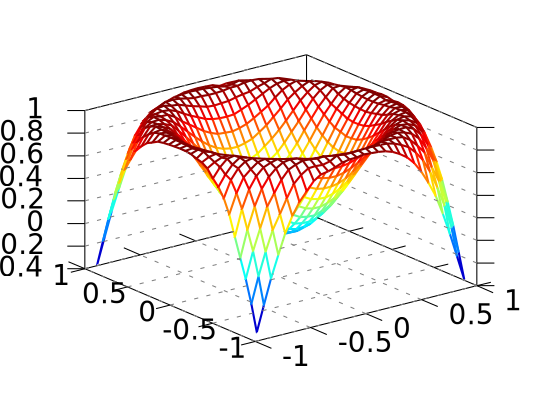

In [7]:
rand ("state", 1);
x = 2*rand (1000,1) - 1;
y = 2*rand (size (x)) - 1;
z = sin (2*(x.^2+y.^2));
[xx,yy] = meshgrid (linspace (-1,1,32));
griddata (x,y,z,xx,yy);
